<a href="https://colab.research.google.com/github/mae25-create/data_visualization-analysis_practice/blob/main/Analysis_of_Loan_Prediction_Based_on_Customer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of Loan Prediction Based on Customer Behavior**

----


**Author:** Jiahao Mei

**Date:** June, 2025

**Datasets:**

* Sample Prediction Dataset.csv
* Test Data.csv
* Training Data.csv

# 1. Read and Examine Data

---




## 1.1 Reading data


In [ ]:
# Loading libraries

import pandas as pd                    # To read, manipulate, and analyze tabular data structures
import matplotlib.pyplot as plt        # To create static, publication-quality 2D plots
import plotly.express as px            # To generate interactive statistical graphics quickly with minimal code
import plotly.graph_objects as go      # To build highly customizable interactive visualizations
import seaborn as sns                  # To create statistical visualizations with built-in themes and color palettes
import statsmodels.formula.api as smf  # To fit statistical models using R-style formulas for streamlined analysis

In [ ]:
# Uploading the datasets

df_predict = pd.read_csv('Sample Prediction Dataset.csv')
df_test = pd.read_csv('Test Data.csv')
df_train = pd.read_csv('Training Data.csv')

In [ ]:
# Dispalying the first few rows to preview the dataframe

df_predict.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [ ]:
df_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [ ]:
df_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## 1.2 Examining Data

In [ ]:
# Understanding rows and columns of the datasets

df_predict.shape

(28000, 2)

In [ ]:
df_test.shape

(28000, 12)

In [ ]:
df_train.shape

(252000, 13)

In [ ]:
# Undestanding the overall information of datasets

df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         28000 non-null  int64
 1   risk_flag  28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
# Understanding the statistical measures from the datasets for analysis

df_predict.describe()

,id,risk_flag
count,28000.000000,28000.000000
mean,14000.500000,0.128321
std,8083.048105,0.334453
min,1.000000,0.000000
25%,7000.750000,0.000000
50%,14000.500000,0.000000
75%,21000.250000,0.000000
max,28000.000000,1.000000


In [ ]:
df_test.describe()

,ID,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000
mean,14000.500000,5.029563e+06,50.054679,10.120393,6.339286,11.991786
std,8083.048105,2.864938e+06,17.129879,6.027317,3.645222,1.397754
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,7000.750000,2.545414e+06,35.000000,5.000000,3.000000,11.000000
50%,14000.500000,5.046744e+06,50.000000,10.000000,6.000000,12.000000
75%,21000.250000,7.474639e+06,65.000000,15.000000,9.000000,13.000000
max,28000.000000,9.999814e+06,79.000000,20.000000,14.000000,14.000000


In [ ]:
df_train.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
# Checking data quality to identify the need for deduplication

df_predict.nunique()

,0
id,28000
risk_flag,2


In [ ]:
df_test.nunique()

,0
ID,28000
Income,9916
Age,59
Experience,21
Married/Single,2
House_Ownership,3
Car_Ownership,2
Profession,51
CITY,317
STATE,29


In [ ]:
df_train.nunique()

,0
Id,252000
Income,41920
Age,59
Experience,21
Married/Single,2
House_Ownership,3
Car_Ownership,2
Profession,51
CITY,317
STATE,29


In [ ]:
# Checking data type to identify formats and values

df_predict.dtypes

,0
id,int64
risk_flag,int64


In [ ]:
df_test.dtypes

,0
ID,int64
Income,int64
Age,int64
Experience,int64
Married/Single,object
House_Ownership,object
Car_Ownership,object
Profession,object
CITY,object
STATE,object


In [ ]:
df_train.dtypes

,0
Id,int64
Income,int64
Age,int64
Experience,int64
Married/Single,object
House_Ownership,object
Car_Ownership,object
Profession,object
CITY,object
STATE,object


In [ ]:
# Checking null values to ensure the accuracy of datasets

df_predict.isnull().sum()

,0
id,0
risk_flag,0


In [ ]:
df_test.isnull().sum()

,0
ID,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


In [ ]:
df_train.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0



## Explanation:

By examining the above datasets, we have a general understading about columns, rows, types, and values. Also, different features (Income, Age, Experience, Married/Single, House\_Ownership, Car\_Ownership, Profession, CITY, STATE, CURRENT\_JOB\_YRS, CURRENT\_HOUSE\_YRS) and the target (Risk\_Flag).


Since every feature show 0 missing entries, we know the datasets are already “clean” with respect to nulls. Therefore, I can move straight into exploring distributions, engineering features, and building models.

# 2. Preprocess Data


---



## Merging into one dataframe

In [ ]:
# Merge prediction by 'id' into test by 'ID' as one dataframe

df_merged = pd.merge(df_test, df_predict, left_on='ID', right_on='id', how='left')
df_merged.drop(columns=['id'], inplace=True)    # Drop the duplicate id column
df_merged.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,risk_flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,1
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,0


In [ ]:
df_merged.shape

(28000, 13)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
 12  risk_flag          28000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.8+ MB


## Explanation:


After preprocessing, I merged **risk\_flag** from Prediction dataset by **'id'** into the Test dataset by creating a single, consolidated table (`df_merged`) with the same feature structure as the Training dataset.

This unified dataset transforms raw predictions into actionable business insights, empowering me to segment by any attribute and uncover meaningful patterns.


# 3. Data Visualizations and Analysis

---



LOGIC:

1. **Variable Overview:**
   We start by taking a bird’s-eye view of every column—using histograms to check each feature’s type, range, distribution, and any glaring quality issues. Understanding these basics ensures we know what we’re working with before probing deeper patterns.

2. **Age Groups vs. Default Risk:**
   Next, we split borrowers into age brackets and use box plots and bar charts to plot each group’s default rate. This quick check tells us whether age alone is a meaningful risk indicator.

3. **Income Levels vs. Default Risk:**
   We then bucket income into custom intervals—visualizing with histograms and heatmaps—to compare default rates across earners. This reveals how much predictive “lift” income contributes.

4. **Interactions of Key Numerical Features:**
   Armed with our strongest predictors, we plot a heatmap to explore their interaction—examining, for example, how income and age together influence default risk.

5. **Work Tenure & Home Tenure Interaction:**
   We use scatter plots to study how years on the job and years in the current home jointly affect risk, highlighting any combined effects that might escape a univariate view.

6. **Scan Remaining Categorical Features:**
   Finally, we survey the rest of our categories—marital status, car ownership, profession, and geography—looking for any hidden pockets of elevated risk.



## 3.1 Variables Overview

In [ ]:
# The risk of overall default rate

overall_rate = df_merged['risk_flag'].mean()

print(f"Predicted default rate: {overall_rate:.1%}")

Predicted default rate: 12.8%


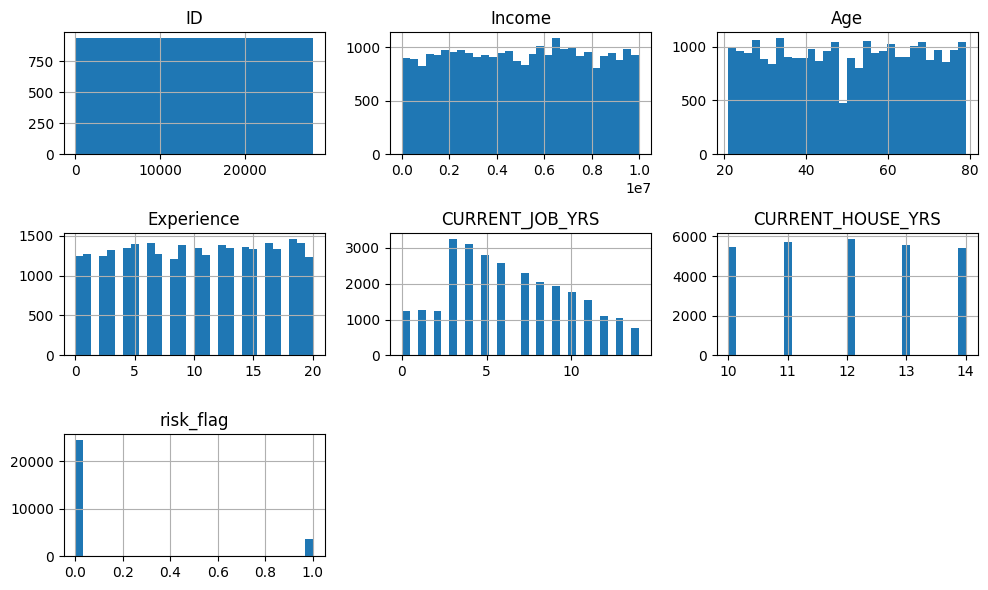

In [ ]:
# Plot histograms for multiple variables

df_merged.hist(figsize = (10, 6), bins=30, ec='black')
plt.tight_layout()

## 3.2 Relationship between Age of Group and the Risk of Default

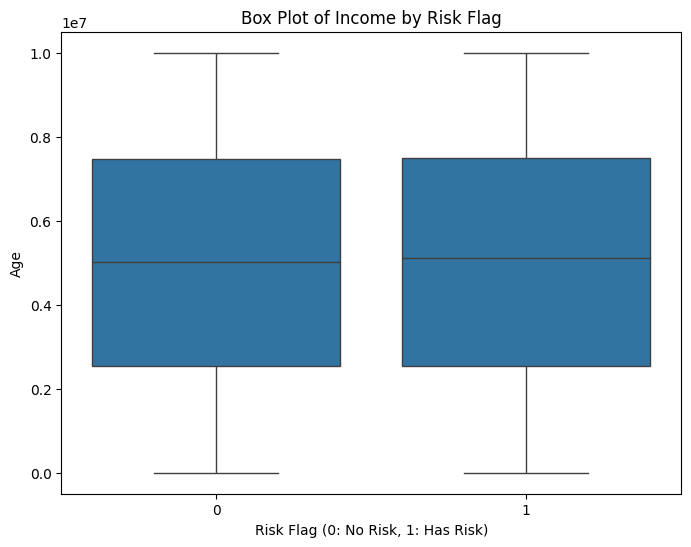

In [ ]:
# Box plot for Age

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_merged, x='risk_flag', y='Income')
plt.title('Box Plot of Income by Risk Flag')
plt.xlabel('Risk Flag (0: No Risk, 1: Has Risk)')
plt.ylabel('Age')
plt.show()

<ipython-input-335-1999dbc265de>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_age = df_merged.groupby('Age_Group')['risk_flag'].mean().reset_index()
<ipython-input-335-1999dbc265de>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rate_by_age, x='Age_Group', y='risk_flag', palette='viridis')


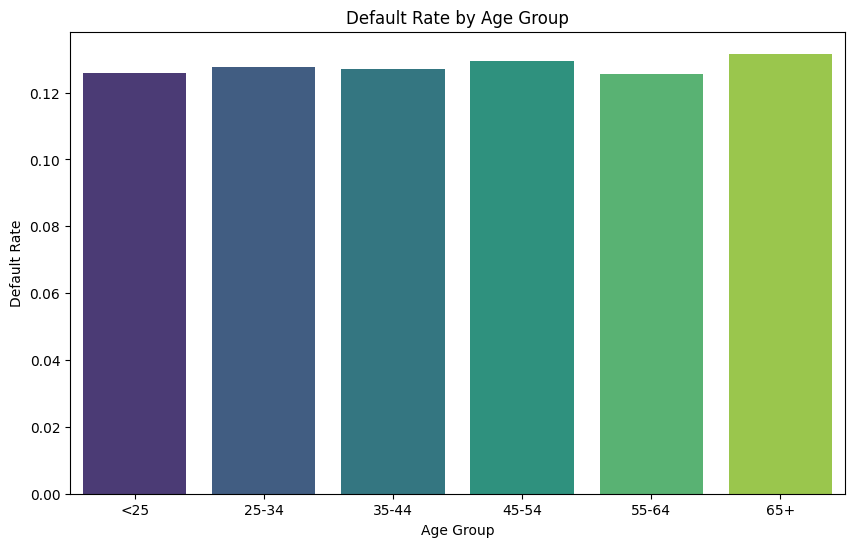

In [ ]:
# Bin Age into groups
df_merged['Age_Group'] = pd.cut(df_merged['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

# Calculate default rate by Age Group
default_rate_by_age = df_merged.groupby('Age_Group')['risk_flag'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=default_rate_by_age, x='Age_Group', y='risk_flag', palette='viridis')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

### Key Insight:

The 45~54 cohort and 65+ cohort show the highest predicted default rate, around 13.2% versus roughly 12.5% for borrowers under 25, which indicating that credit risk actually ticks up among order age groups.

## 3.3 Relationship between Income Tier and Risk of Default


<Axes: >

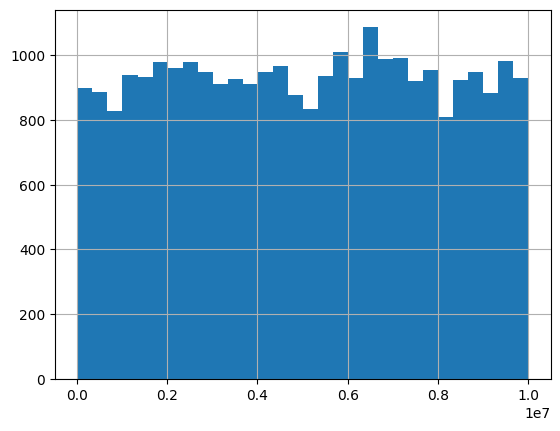

In [ ]:
# Plot histogram for 'Income'

df_merged['Income'].hist(bins=30, ec='black')

<ipython-input-337-f233f5aa4499>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_income_tier = df_merged.groupby('Income_Tier')['risk_flag'].mean().reset_index()
<ipython-input-337-f233f5aa4499>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_merged.pivot_table(index='Income_Tier', columns='risk_flag', aggfunc='size', fill_value=0)


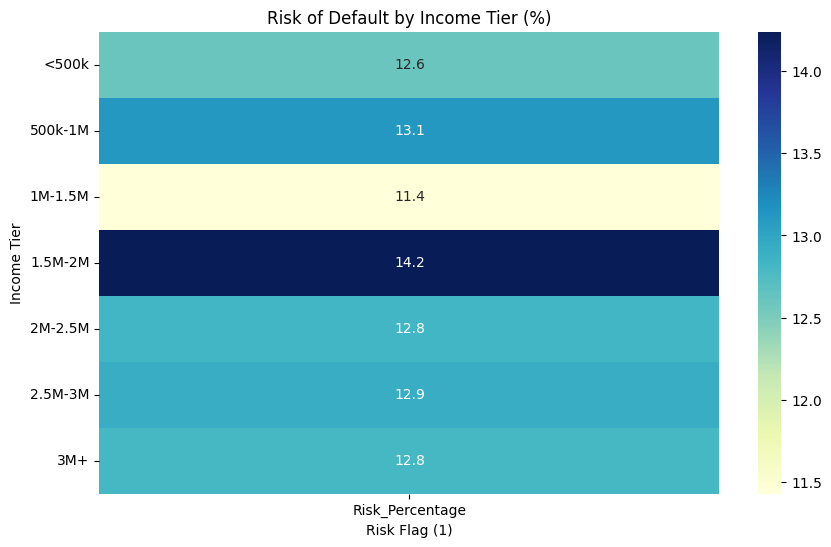

In [ ]:
# prompt: generate a heatmap for income and risk of default (risk flag =1 means has risk)

# Bin Income into custom tiers
income_bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 100000000]
income_labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M+']
df_merged['Income_Tier'] = pd.cut(df_merged['Income'], bins=income_bins, labels=income_labels, right=False)

# Calculate the mean risk flag for each income tier
risk_by_income_tier = df_merged.groupby('Income_Tier')['risk_flag'].mean().reset_index()

# Create a heatmap of default rate by Income Tier and Risk Flag
# Pivot the table for the heatmap
heatmap_data = df_merged.pivot_table(index='Income_Tier', columns='risk_flag', aggfunc='size', fill_value=0)

# Calculate the percentage of risk within each income tier
heatmap_data['Total'] = heatmap_data[0] + heatmap_data[1]
heatmap_data['Risk_Percentage'] = (heatmap_data[1] / heatmap_data['Total']) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data[['Risk_Percentage']], annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Risk of Default by Income Tier (%)')
plt.xlabel('Risk Flag (1)')
plt.ylabel('Income Tier')
plt.yticks(rotation=0)
plt.show()

### Key Insight:

The predicted default rate is highest for those in the 1.5 million to 2 million income bracket, at 14.2%, while the predicted default rate is lowest for those in the 1 million to 1.5 million income bracket, at 11.4%. This suggests that there is a nonlinear "sweet spot" in income, where middle- and high-income earners are actually more likely to default.

## 3.4 Age of Group vs. Income Tier

<ipython-input-338-91a8cbaa6af4>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data_binned = df_merged.groupby(['Age_Bin', 'Income_Bin'])['risk_flag'].mean().reset_index()
<ipython-input-338-91a8cbaa6af4>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_pivot_binned = heatmap_data_binned.pivot_table(index='Age_Bin', columns='Income_Bin', values='risk_flag')


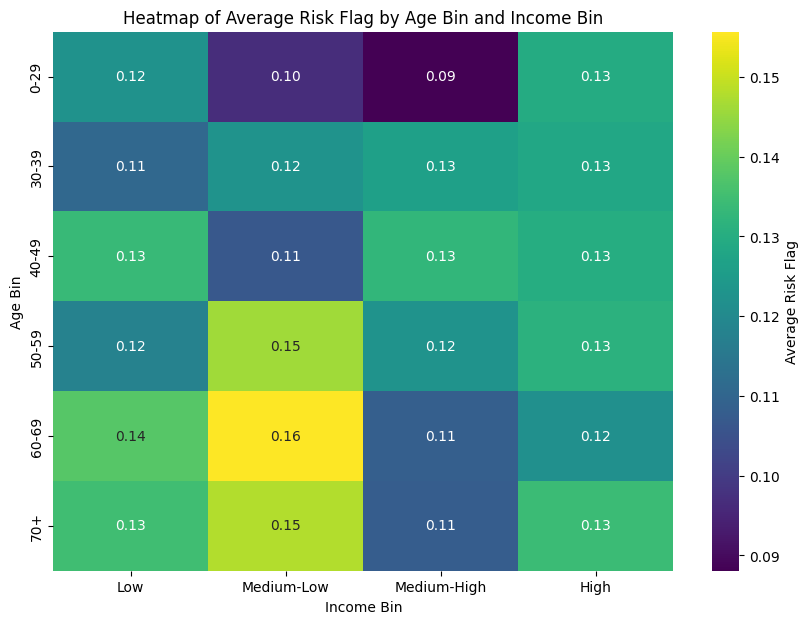

In [ ]:
# Create bins for Income and Age for a less granular heatmap:

# Define bins for Age
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_merged['Age_Bin'] = pd.cut(df_merged['Age'], bins=age_bins, labels=age_labels, right=False)

# Define bins for Income
# You might need to adjust these bins based on the distribution of your Income data
# For example, using quantiles or specific income thresholds
income_bins = [df_merged['Income'].min(), 500000, 1000000, 1500000, df_merged['Income'].max()]
income_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
df_merged['Income_Bin'] = pd.cut(df_merged['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Group by the new bins and calculate the mean risk flag
heatmap_data_binned = df_merged.groupby(['Age_Bin', 'Income_Bin'])['risk_flag'].mean().reset_index()

# Pivot the binned data
heatmap_pivot_binned = heatmap_data_binned.pivot_table(index='Age_Bin', columns='Income_Bin', values='risk_flag')

# Create the heatmap using the binned data
plt.figure(figsize=(10, 7)) # Adjust figure size as needed
sns.heatmap(heatmap_pivot_binned, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Average Risk Flag'})
plt.title('Heatmap of Average Risk Flag by Age Bin and Income Bin')
plt.xlabel('Income Bin')
plt.ylabel('Age Bin')
plt.show()

### Key Insight:

The heatmap highlights that borrowers aged **60–69** in the **medium-low income** bracket exhibit the highest default rate (≈16%), while the **0–29** group with **medium-high incomes** has the lowest (≈9%).

## 3.5 Current Job vs. House Situations

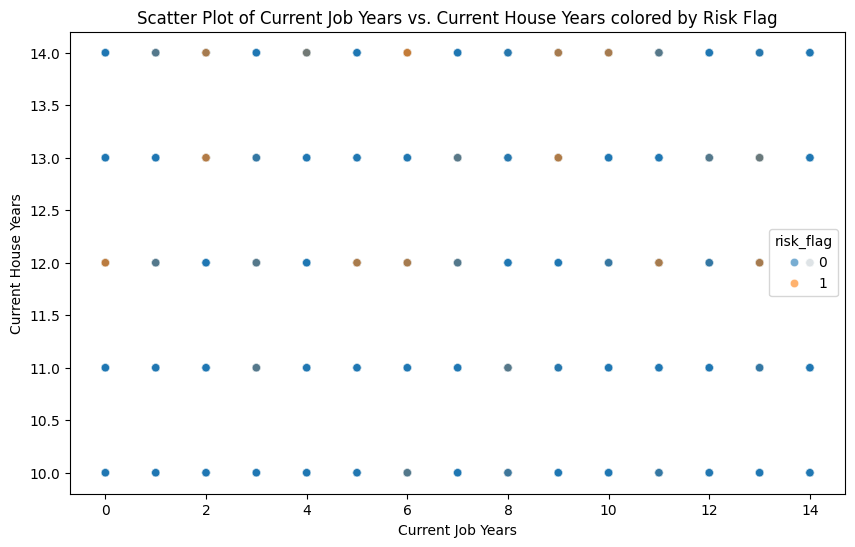

In [ ]:
# Create a scatter plot of CURRENT_JOB_YRS vs. CURRENT_HOUSE_YRS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='CURRENT_JOB_YRS', y='CURRENT_HOUSE_YRS', hue='risk_flag', alpha=0.6)
plt.title('Scatter Plot of Current Job Years vs. Current House Years colored by Risk Flag')
plt.xlabel('Current Job Years')
plt.ylabel('Current House Years')
plt.show()

### Key Insight:

The probability of default is higher for houses with longer current years (>= 12.0), while the current job years cannot clearly distinguish between high-risk and low-risk customers. There is a possibility of default in each current job years range.

## 3.6 Other Category Features

In [ ]:
# Find the relationship between risk_flag=1 and Married/Single, House_Ownership, Car_Ownership
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']

for col in categorical_cols:
    print(f"\nAnalyzing relationship between risk_flag and {col}:")
    contingency_table = pd.crosstab(df_merged[col], df_merged['risk_flag'], normalize='index')
    print(contingency_table)


Analyzing relationship between risk_flag and Married/Single:
risk_flag              0         1
Married/Single                    
married         0.867845  0.132155
single          0.872110  0.127890

Analyzing relationship between risk_flag and House_Ownership:
risk_flag               0         1
House_Ownership                    
norent_noown     0.865359  0.134641
owned            0.850350  0.149650
rented           0.873048  0.126952

Analyzing relationship between risk_flag and Car_Ownership:
risk_flag             0         1
Car_Ownership                    
no             0.874446  0.125554
yes            0.865194  0.134806


### Key Insights:

* **Marital Status:** Married borrowers show a slightly higher predicted default rate (\~13.2%) than singles (\~12.8%), though the gap is marginal.
* **Home Ownership:** Surprisingly, outright homeowners have the highest default rate (\~15.0%), followed by those who neither rent nor own (\~13.5%), while renters carry the lowest risk (\~12.7%).
* **Car Ownership:** Car owners default at about 13.5%, compared to 12.6% for non-owners—suggesting that car ownership correlates with a modest uptick in risk.

# 5. Summary


---



## Conclusion


After splicing our predictions with the test set, we found a clear picture of the factors driving credit risk:

1. **Age** proved to be a weak independent signal: the default rate only climbed from about 12.5% ​​in the youngest group to 13.2% for those over 65.
2. **Income** showed a clear but nonlinear effect: the middle- and high-income groups (1.5 million to 2 million) had the highest default risk (about 14.2%), while the low-income group (<500,000) and high-income group (>3 million) both had default risks close to 12.6% to 12.8%.
3. **Year indicators** - years of work and current housing age - spread defaulters and non-defaulters across the range, indicating that they have low discriminative power either independently or in combination.
4. **Other categories** offer subtle but actionable clues: Married borrowers default at a slightly higher rate than singles, car owners default at a higher rate than non-car owners, and homeowners default at a higher rate than renters (15.0% vs. 12.7%).

## Recommendations


**For Business Strategies:**

1. Group borrowers based on their predicted risk scores and adjust your credit policies and resource allocation accordingly.
2. Develop or improve loan products (including features, product portfolios, credit limits) so that they resonate with both low-risk "champions" and high-risk groups.
3. Develop high-level messaging and promotion plans for each risk tier to promote loans for creditworthy borrowers and proactively support higher-risk borrowers.


**For Tech Strategies:**

1. Use model outputs to guide broad pricing tiers and underwriting thresholds, ensuring that high-risk groups bear appropriately calibrated costs.
2. Maintain a cycle of data collection, model optimization, and strategy updates to align your credit policies with changing customer behavior.
3. Regularly track actual performance of market segments compared to predicted results and adjust strategies or retrain models as needed.

# References


---

Google. (2025). *Google Colab* [Computer software]. https://colab.research.google.com/

OpenAI. (2025). *ChatGPT* [Large language model]. https://chatgpt.com/g/g-p-682df32ac28c8191a525e4d514c1cdb9-python/c/682f6cb5-9324-8004-88d6-944401ebb042


Jain, S. (2021). *Loan Prediction Based on Customer Behavior* \[Datasets]. Kaggle. https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior/data